In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
datos = pd.read_excel("dataset_sales_practica.xlsx")

In [3]:
datos

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2017-152156 2017-11-08 2017-11-11    Second Class   
1          2  CA-2017-152156 2017-11-08 2017-11-11    Second Class   
2          3  CA-2017-138688 2017-06-12 2017-06-16    Second Class   
3          4  US-2016-108966 2016-10-11 2016-10-18  Standard Class   
4          5  US-2016-108966 2016-10-11 2016-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9795    9796  CA-2017-125920 2017-05-21 2017-05-28  Standard Class   
9796    9797  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   
9797    9798  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   
9798    9799  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   
9799    9800  CA-2016-128608 2016-01-12 2016-01-17  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9795    SH-19975     Sally Hughsby  Corporate  United States          Chicago   
9796    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9797    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9798    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   
9799    CS-12490  Cindy Schnelling  Corporate  United States           Toledo   

           State  Postal Code   Region       Product ID         Category  \
0       Kentucky      42420.0    South  FUR-BO-10001798        Furniture   
1       Kentucky      42420.0    South  FUR-CH-10000454        Furniture   
2     California      90036.0     West  OFF-LA-10000240  Office Supplies   
3        Florida      33311.0    South  FUR-TA-10000577        Furniture   
4        Florida      33311.0    South  OFF-ST-10000760  Office Supplies   
...          ...          ...      ...              ...              ...   
9795    Illinois      60610.0  Central  OFF-BI-10003429  Office Supplies   
9796        Ohio      43615.0     East  OFF-AR-10001374  Office Supplies   
9797        Ohio      43615.0     East  TEC-PH-10004977       Technology   
9798        Ohio      43615.0     East  TEC-PH-10000912       Technology   
9799        Ohio      43615.0     East  TEC-AC-10000487       Technology   

     Sub-Category                                       Product Name  \
0       Bookcases                  Bush Somerset Collection Bookcase   
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
2          Labels  Self-Adhesive Address Labels for Typewriters b...   
3          Tables      Bretford CR4500 Series Slim Rectangular Table   
4         Storage                     Eldon Fold 'N Roll Cart System   
...           ...                                                ...   
9795      Binders  Cardinal HOLDit! Binder Insert Strips,Extra St...   
9796          Art           BIC Brite Liner Highlighters, Chisel Tip   
9797       Phones                                        GE 30524EE4   
9798       Phones           Anker 24W Portable Micro USB Car Charger   
9799  Accessories                SanDisk Cruzer 4 GB USB Flash Drive   

           Sales  
0         261.96  
1         731.94  
2          14.62  
3     9575775.00  
4       22368.00  
...          ...  
9795     3798.00  
9796    10368.00  
9797   235188.00  
9798    26376.00  
9799    10384.00  

[9800 rows x 18 columns]

In [4]:
# I removed some columns because they are not important for the analyzis
columnas_a_eliminar = ['Order ID', 'Customer ID', 'Country', 'Country']
datos = datos.drop(columns=columnas_a_eliminar)
print(datos.head())

   Row ID Order Date  Ship Date       Ship Mode    Customer Name    Segment  \
0       1 2017-11-08 2017-11-11    Second Class      Claire Gute   Consumer   
1       2 2017-11-08 2017-11-11    Second Class      Claire Gute   Consumer   
2       3 2017-06-12 2017-06-16    Second Class  Darrin Van Huff  Corporate   
3       4 2016-10-11 2016-10-18  Standard Class   Sean O'Donnell   Consumer   
4       5 2016-10-11 2016-10-18  Standard Class   Sean O'Donnell   Consumer   

              City       State  Postal Code Region       Product ID  \
0        Henderson    Kentucky      42420.0  South  FUR-BO-10001798   
1        Henderson    Kentucky      42420.0  South  FUR-CH-10000454   
2      Los Angeles  California      90036.0   West  OFF-LA-10000240   
3  Fort Lauderdale     Florida      33311.0  South  FUR-TA-10000577   
4  Fort Lauderdale     Florida      33311.0  South  OFF-ST-10000760   

          Category Sub-Category  \
0        Furniture    Bookcases   
1        Furniture       Cha

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
datos.describe(include='all')

Row ID                     Order Date                      Ship Date  \
count  9800.00                           9800                           9800   
unique     NaN                            NaN                            NaN   
top        NaN                            NaN                            NaN   
freq       NaN                            NaN                            NaN   
mean   4900.50  2017-05-01 05:13:51.673469440  2017-05-05 04:17:52.653061120   
min       1.00            2015-01-03 00:00:00            2015-01-07 00:00:00   
25%    2450.75            2016-05-24 00:00:00            2016-05-27 18:00:00   
50%    4900.50            2017-06-26 00:00:00            2017-06-29 00:00:00   
75%    7350.25            2018-05-15 00:00:00            2018-05-19 00:00:00   
max    9800.00            2018-12-30 00:00:00            2019-01-05 00:00:00   
std    2829.16                            NaN                            NaN   

             Ship Mode  Customer Name   Segment           City       State  \
count             9800           9800      9800           9800        9800   
unique               4            793         3            529          49   
top     Standard Class  William Brown  Consumer  New York City  California   
freq              5859             35      5101            891        1946   
mean               NaN            NaN       NaN            NaN         NaN   
min                NaN            NaN       NaN            NaN         NaN   
25%                NaN            NaN       NaN            NaN         NaN   
50%                NaN            NaN       NaN            NaN         NaN   
75%                NaN            NaN       NaN            NaN         NaN   
max                NaN            NaN       NaN            NaN         NaN   
std                NaN            NaN       NaN            NaN         NaN   

        Postal Code Region       Product ID         Category Sub-Category  \
count       9789.00   9800             9800             9800         9800   
unique          NaN      4             1861                3           17   
top             NaN   West  OFF-PA-10001970  Office Supplies      Binders   
freq            NaN   3140               19             5909         1492   
mean       55273.32    NaN              NaN              NaN          NaN   
min         1040.00    NaN              NaN              NaN          NaN   
25%        23223.00    NaN              NaN              NaN          NaN   
50%        58103.00    NaN              NaN              NaN          NaN   
75%        90008.00    NaN              NaN              NaN          NaN   
max        99301.00    NaN              NaN              NaN          NaN   
std        32041.22    NaN              NaN              NaN          NaN   

           Product Name       Sales  
count              9800     9794.00  
unique             1849         NaN  
top     Staple envelope         NaN  
freq                 47         NaN  
mean                NaN   101351.60  
min                 NaN        0.44  
25%                 NaN       39.88  
50%                 NaN      355.66  
75%                 NaN    25320.00  
max                 NaN 23962656.00  
std                 NaN   521687.74

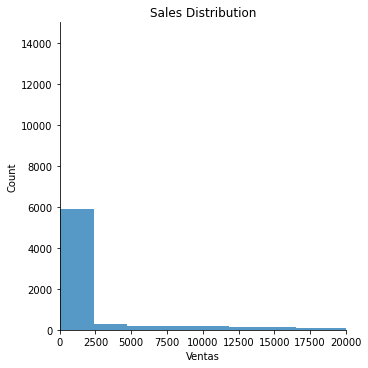

In [6]:
sns.displot(datos['Sales'])
plt.title('Sales Distribution')
plt.xlabel('Ventas')
plt.xlim(0, 20000)  
plt.ylim(0, 15000)
plt.show()

In [7]:
rows_with_nulls = datos[datos.isnull().any(axis=1)]
print(rows_with_nulls)

      Row ID Order Date  Ship Date       Ship Mode     Customer Name  \
181      182 2015-12-05 2015-12-09    Second Class    David Kendrick   
430      431 2017-04-15 2017-04-21  Standard Class        Ross Baird   
431      432 2017-04-15 2017-04-21  Standard Class        Ross Baird   
1406    1407 2015-04-06 2015-04-08     First Class   Shirley Daniels   
1969    1970 2018-09-23 2018-09-29  Standard Class    Bill Donatelli   
1971    1972 2018-05-06 2018-05-11  Standard Class        Max Ludwig   
2234    2235 2018-12-05 2018-12-10  Standard Class      Quincy Jones   
5274    5275 2016-11-07 2016-11-09    Second Class  Stewart Visinsky   
8798    8799 2017-04-06 2017-04-10  Standard Class   Valerie Mitchum   
9146    9147 2017-01-23 2017-01-27  Standard Class  Claudia Bergmann   
9147    9148 2017-01-23 2017-01-27  Standard Class  Claudia Bergmann   
9148    9149 2017-01-23 2017-01-27  Standard Class  Claudia Bergmann   
9386    9387 2018-01-19 2018-01-23  Standard Class     Raymond M

In [8]:
# I removed rows with missing values in the 'Sales' column from the DataFrame 
datos = datos.dropna(subset=['Sales'])
print(datos.head())

   Row ID Order Date  Ship Date       Ship Mode    Customer Name    Segment  \
0       1 2017-11-08 2017-11-11    Second Class      Claire Gute   Consumer   
1       2 2017-11-08 2017-11-11    Second Class      Claire Gute   Consumer   
2       3 2017-06-12 2017-06-16    Second Class  Darrin Van Huff  Corporate   
3       4 2016-10-11 2016-10-18  Standard Class   Sean O'Donnell   Consumer   
4       5 2016-10-11 2016-10-18  Standard Class   Sean O'Donnell   Consumer   

              City       State  Postal Code Region       Product ID  \
0        Henderson    Kentucky     42420.00  South  FUR-BO-10001798   
1        Henderson    Kentucky     42420.00  South  FUR-CH-10000454   
2      Los Angeles  California     90036.00   West  OFF-LA-10000240   
3  Fort Lauderdale     Florida     33311.00  South  FUR-TA-10000577   
4  Fort Lauderdale     Florida     33311.00  South  OFF-ST-10000760   

          Category Sub-Category  \
0        Furniture    Bookcases   
1        Furniture       Cha

In [9]:
# Calculating the 99th percentile of the 'Sales' column and filtering out the outliers
q = datos['Sales'].quantile(0.99)
Data = datos[datos['Sales'] <= q]
outliers = datos[datos['Sales'] > q]
Data.describe(include='all')

Row ID                     Order Date                      Ship Date  \
count  9696.00                           9696                           9696   
unique     NaN                            NaN                            NaN   
top        NaN                            NaN                            NaN   
freq       NaN                            NaN                            NaN   
mean   4901.91  2017-04-30 22:13:04.158415616  2017-05-04 21:12:10.693069312   
min       1.00            2015-01-03 00:00:00            2015-01-07 00:00:00   
25%    2452.75            2016-05-25 00:00:00            2016-05-28 00:00:00   
50%    4903.50            2017-06-26 00:00:00            2017-06-28 12:00:00   
75%    7347.25            2018-05-15 00:00:00            2018-05-19 00:00:00   
max    9800.00            2018-12-30 00:00:00            2019-01-05 00:00:00   
std    2825.59                            NaN                            NaN   

             Ship Mode  Customer Name   Segment           City       State  \
count             9696           9696      9696           9696        9696   
unique               4            793         3            528          48   
top     Standard Class  William Brown  Consumer  New York City  California   
freq              5794             35      5049            881        1921   
mean               NaN            NaN       NaN            NaN         NaN   
min                NaN            NaN       NaN            NaN         NaN   
25%                NaN            NaN       NaN            NaN         NaN   
50%                NaN            NaN       NaN            NaN         NaN   
75%                NaN            NaN       NaN            NaN         NaN   
max                NaN            NaN       NaN            NaN         NaN   
std                NaN            NaN       NaN            NaN         NaN   

        Postal Code Region       Product ID         Category Sub-Category  \
count       9685.00   9696             9696             9696         9696   
unique          NaN      4             1857                3           17   
top             NaN   West  OFF-PA-10001970  Office Supplies      Binders   
freq            NaN   3106               19             5890         1478   
mean       55211.75    NaN              NaN              NaN          NaN   
min         1040.00    NaN              NaN              NaN          NaN   
25%        23223.00    NaN              NaN              NaN          NaN   
50%        57103.00    NaN              NaN              NaN          NaN   
75%        90008.00    NaN              NaN              NaN          NaN   
max        99301.00    NaN              NaN              NaN          NaN   
std        32054.25    NaN              NaN              NaN          NaN   

           Product Name      Sales  
count              9696    9696.00  
unique             1844        NaN  
top     Staple envelope        NaN  
freq                 47        NaN  
mean                NaN   63785.13  
min                 NaN       0.44  
25%                 NaN      38.88  
50%                 NaN     335.20  
75%                 NaN   22800.00  
max                 NaN 1598058.00  
std                 NaN  179758.10

In [10]:
print(Data.isnull().sum())

Row ID            0
Order Date        0
Ship Date         0
Ship Mode         0
Customer Name     0
Segment           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


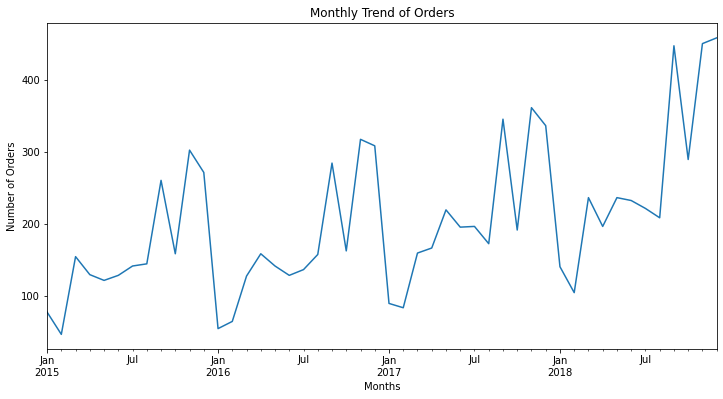

In [11]:
# Grouping by month and counting the number of orders.
monthly_orders = Data.resample('ME', on='Order Date').size()

# Creating a line plot to visualize the monthly trends in orders
plt.figure(figsize=(12, 6))
monthly_orders.plot()
plt.title('Monthly Trend of Orders')
plt.xlabel('Months')
plt.ylabel('Number of Orders')
plt.show()

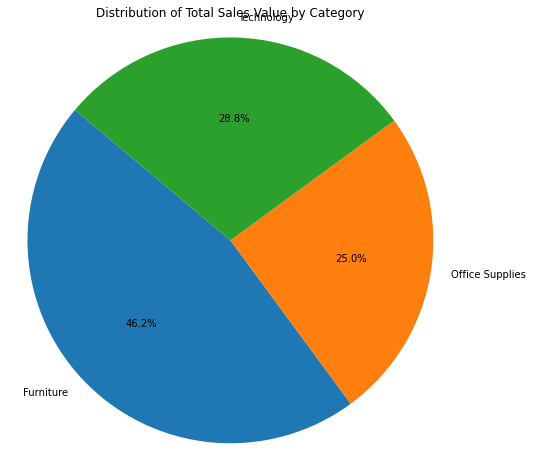

In [12]:
# Calculating the total sales by category
total_sales_by_category = Data.groupby('Category')['Sales'].sum()
plt.figure(figsize=(8, 8))
plt.pie(total_sales_by_category, labels=total_sales_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Sales Value by Category')
plt.axis('equal')
plt.show()

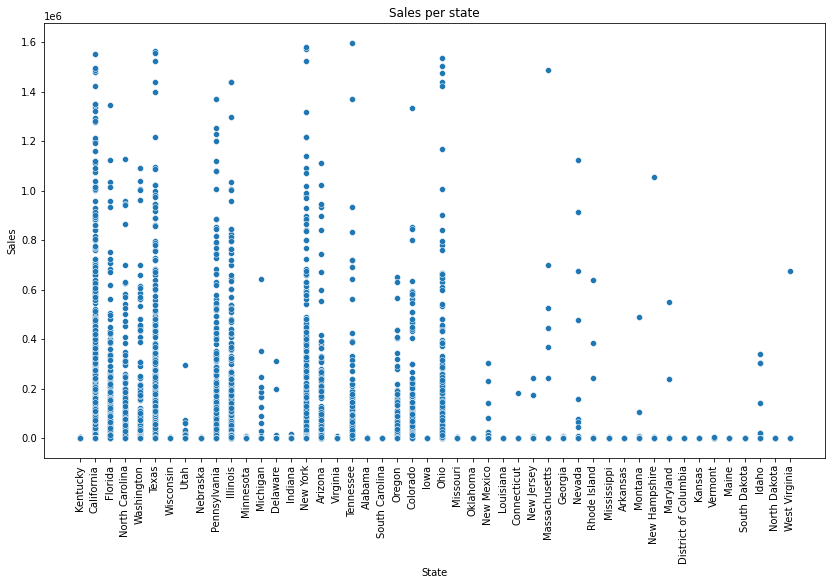

In [13]:
# Creating a scatter plot to visualize the distribution of sales by state
plt.figure(figsize=(14, 8))
sns.scatterplot(x='State', y='Sales', data=Data)
plt.title('Sales per state')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

In [14]:
import plotly.express as px

# Creating a treemap visualization of sales by product name, colored by category.

fig = px.treemap(Data, 
                 path=['Category', 'Product Name'], 
                 values='Sales',
                 title='Treemap of Sales by Product Name, Colored by Category',
                 color='Category',
                 color_discrete_map={'Office Supplies': 'blue', 
                                     'Furniture': 'green', 
                                     'Technology': 'red'},  
                 )

fig.update_traces(textinfo='label+value')
fig.show()

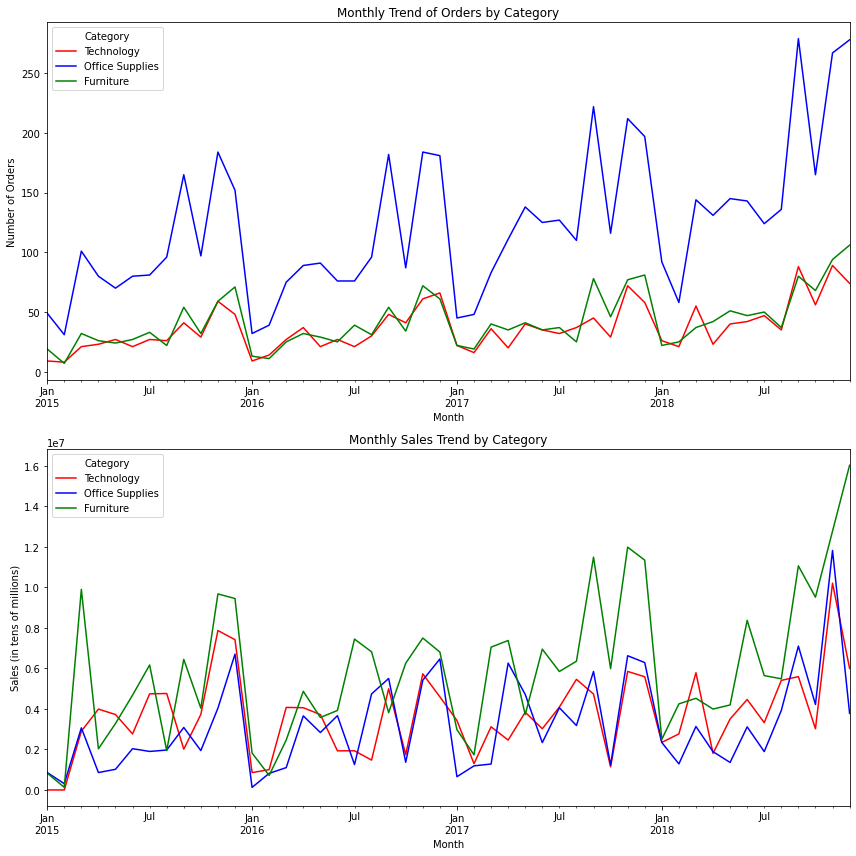

In [15]:
# Plotting the monthly trend of orders for each category on the first subplot and he monthly sales trend for each category on the second subplot.

category_colors = {'Technology': 'red', 'Office Supplies': 'blue', 'Furniture': 'green'}
monthly_orders = Data.groupby([pd.Grouper(key='Order Date', freq='ME'), 'Category']).size().unstack()
monthly_sales = Data.groupby([pd.Grouper(key='Order Date', freq='ME'), 'Category'])['Sales'].sum().unstack()
fig, axs = plt.subplots(2, figsize=(12, 12))


for category, color in category_colors.items():
    monthly_orders[category].plot(ax=axs[0], color=color, label=category)
axs[0].set_title('Monthly Trend of Orders by Category')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Orders')
axs[0].legend(title='Category')


for category, color in category_colors.items():
    monthly_sales[category].plot(ax=axs[1], color=color, label=category)
axs[1].set_title('Monthly Sales Trend by Category')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Sales (in tens of millions)')
axs[1].legend(title='Category')

plt.tight_layout()
plt.show()

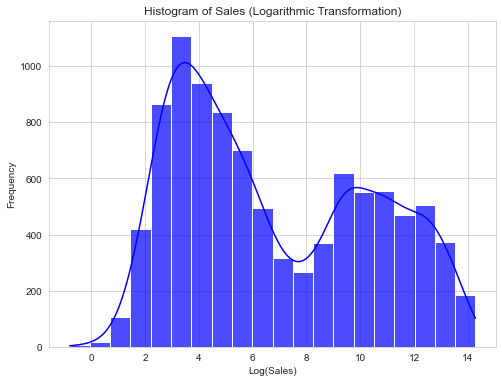

In [16]:
# Creating a histogram of sales data.

sales_data = Data['Sales']
sales_data_log = np.log(Data['Sales'])
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.histplot(sales_data_log, bins=20, kde=True, color='blue', alpha=0.7)
plt.title('Histogram of Sales (Logarithmic Transformation)')
plt.xlabel('Log(Sales)')
plt.ylabel('Frequency')
plt.show()

In [17]:
Data.describe(include='all')

Row ID                     Order Date                      Ship Date  \
count  9696.00                           9696                           9696   
unique     NaN                            NaN                            NaN   
top        NaN                            NaN                            NaN   
freq       NaN                            NaN                            NaN   
mean   4901.91  2017-04-30 22:13:04.158415616  2017-05-04 21:12:10.693069312   
min       1.00            2015-01-03 00:00:00            2015-01-07 00:00:00   
25%    2452.75            2016-05-25 00:00:00            2016-05-28 00:00:00   
50%    4903.50            2017-06-26 00:00:00            2017-06-28 12:00:00   
75%    7347.25            2018-05-15 00:00:00            2018-05-19 00:00:00   
max    9800.00            2018-12-30 00:00:00            2019-01-05 00:00:00   
std    2825.59                            NaN                            NaN   

             Ship Mode  Customer Name   Segment           City       State  \
count             9696           9696      9696           9696        9696   
unique               4            793         3            528          48   
top     Standard Class  William Brown  Consumer  New York City  California   
freq              5794             35      5049            881        1921   
mean               NaN            NaN       NaN            NaN         NaN   
min                NaN            NaN       NaN            NaN         NaN   
25%                NaN            NaN       NaN            NaN         NaN   
50%                NaN            NaN       NaN            NaN         NaN   
75%                NaN            NaN       NaN            NaN         NaN   
max                NaN            NaN       NaN            NaN         NaN   
std                NaN            NaN       NaN            NaN         NaN   

        Postal Code Region       Product ID         Category Sub-Category  \
count       9685.00   9696             9696             9696         9696   
unique          NaN      4             1857                3           17   
top             NaN   West  OFF-PA-10001970  Office Supplies      Binders   
freq            NaN   3106               19             5890         1478   
mean       55211.75    NaN              NaN              NaN          NaN   
min         1040.00    NaN              NaN              NaN          NaN   
25%        23223.00    NaN              NaN              NaN          NaN   
50%        57103.00    NaN              NaN              NaN          NaN   
75%        90008.00    NaN              NaN              NaN          NaN   
max        99301.00    NaN              NaN              NaN          NaN   
std        32054.25    NaN              NaN              NaN          NaN   

           Product Name      Sales  
count              9696    9696.00  
unique             1844        NaN  
top     Staple envelope        NaN  
freq                 47        NaN  
mean                NaN   63785.13  
min                 NaN       0.44  
25%                 NaN      38.88  
50%                 NaN     335.20  
75%                 NaN   22800.00  
max                 NaN 1598058.00  
std                 NaN  179758.10

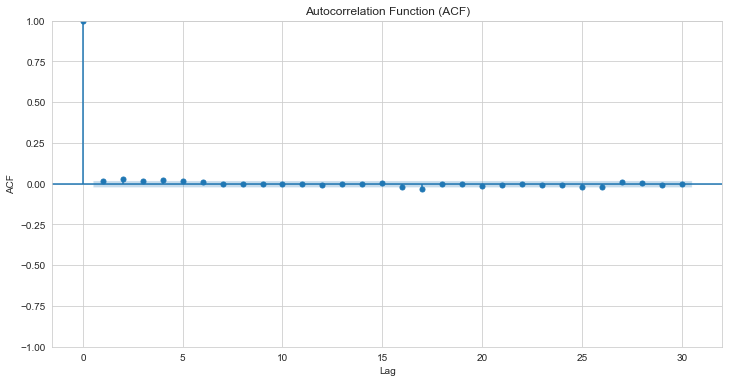

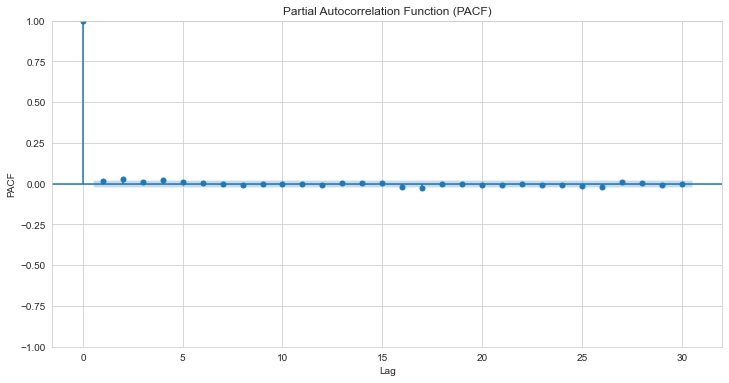

In [18]:
# Plotting the autocorrelation function (ACF) and partial autocorrelation function (PACF) of the sales data.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(Data['Sales'], lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(Data['Sales'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

C:\Users\rapla\AppData\Local\Temp/ipykernel_20084/2078070645.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\rapla\Documents\Programacion\Instalador_python_and_anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\rapla\Documents\Programacion\Instalador_python_and_anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rapla\Documents\Programacion\Instalador_python_and_anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unkn

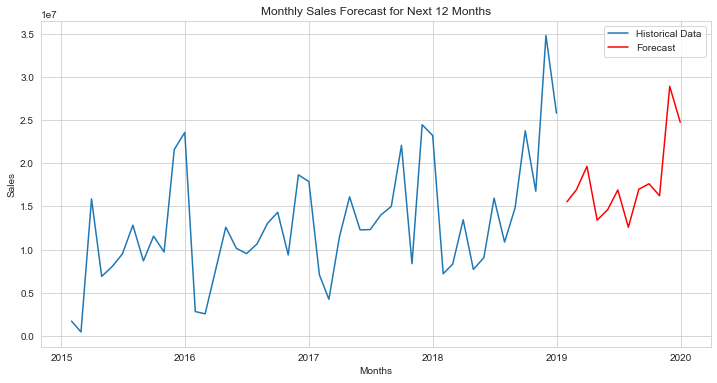

In [19]:
# Generating a forecast for monthly sales using an ARIMA model with order parameters (17, 1, 17).
# The model is fitted to historical data, and then projections are made for the next 12 months.
# The historical data is plotted along with the forecasted values to visualize the trend over time.

from statsmodels.tsa.arima.model import ARIMA

Data['Order Date'] = pd.to_datetime(Data['Order Date'])
monthly_sales = Data.resample('ME', on='Order Date')['Sales'].sum()
model = ARIMA(monthly_sales, order=(17, 1, 17))
result = model.fit()
forecast = result.predict(start=len(monthly_sales), end=len(monthly_sales) + 11, typ='levels', dynamic=False)
future_dates = pd.date_range(start=monthly_sales.index[-1], periods=13, freq='ME')[1:]


plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Historical Data')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.title('Monthly Sales Forecast for Next 12 Months')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.show()

C:\Users\rapla\Documents\Programacion\Instalador_python_and_anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\rapla\Documents\Programacion\Instalador_python_and_anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



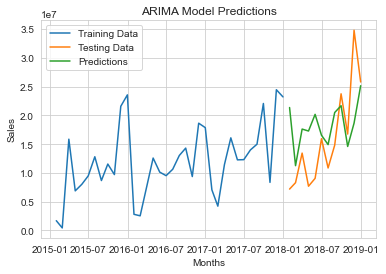

In [20]:
# The plot displays the training data, testing data (last 12 months), and the model's predictions for the testing period.
train = monthly_sales.iloc[:-12]  # Historical data for training (excluding last 12 months)
test = monthly_sales.iloc[-12:]   # Last 12 months for testing

from statsmodels.tsa.arima.model import ARIMA

modelo_arima = ARIMA(train, order=(17, 1, 17))
modelo_entrenado = modelo_arima.fit()

predicciones = modelo_entrenado.forecast(steps=len(test))
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(test.index, predicciones, label='Predictions')
plt.title('ARIMA Model Predictions')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [21]:
Data.loc[:, 'Month'] = Data['Order Date'].dt.month

C:\Users\rapla\AppData\Local\Temp/ipykernel_20084/1305103047.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
Data.loc[:, 'Order Date'] = pd.to_datetime(Data['Order Date'])

monthly_sales = Data.set_index('Order Date').resample('ME')['Sales'].sum()
print(monthly_sales.head)

<bound method NDFrame.head of Order Date
2015-01-31    1700135.09
2015-02-28     443852.12
2015-03-31   15868162.01
2015-04-30    6886635.36
2015-05-31    8027585.35
2015-06-30    9486420.58
2015-07-31   12817234.53
2015-08-31    8678354.60
2015-09-30   11545061.01
2015-10-31    9712826.64
2015-11-30   21587942.86
2015-12-31   23571343.51
2016-01-31    2809555.08
2016-02-29    2545596.23
2016-03-31    7646698.11
2016-04-30   12589128.22
2016-05-31   10139405.75
2016-06-30    9526187.84
2016-07-31   10638336.91
2016-08-31   13034371.21
2016-09-30   14315965.57
2016-10-31    9371058.37
2016-11-30   18648704.58
2016-12-31   17873638.61
2017-01-31    7062902.08
2017-02-28    4226615.97
2017-03-31   11452140.59
2017-04-30   16101852.11
2017-05-31   12275289.75
2017-06-30   12309837.14
2017-07-31   13996511.62
2017-08-31   14997212.77
2017-09-30   22072721.64
2017-10-31    8359231.56
2017-11-30   24462199.59
2017-12-31   23217341.23
2018-01-31    7193169.11
2018-02-28    8304475.55
2018-03-3

In [23]:
# I conducted the Augmented Dickey-Fuller test (ADF) on the monthly sales data to assess the stationarity of the time series. 

from statsmodels.tsa.stattools import adfuller


result = adfuller(monthly_sales)
print('Estadística ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:', result[4])

Estadística ADF: -4.57808009361797
Valor p: 0.00014173474091932
Valores críticos: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}


In [24]:
# the p-value (0.00014173474091932) is less than the commonly used significance level of 5%. It means monthly sales are stationary.

In [25]:
# Fitting an ARIMA (AutoRegressive Integrated Moving Average) model to the training data.

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(train, order=(17, 1, 17))
result = model.fit()

# Get residuals
residuals = result.resid

C:\Users\rapla\Documents\Programacion\Instalador_python_and_anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\rapla\Documents\Programacion\Instalador_python_and_anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



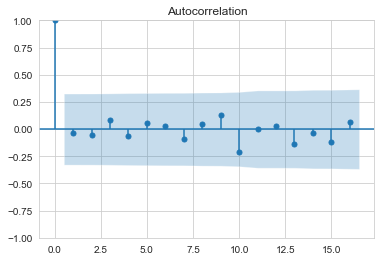

In [26]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(residuals)
plt.show()

In [27]:
# There are not autocorrelations, model is working properly

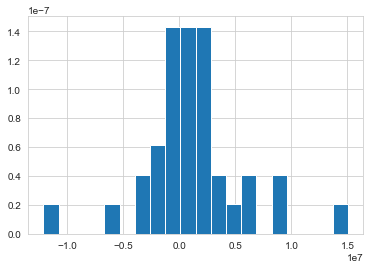

Shapiro-Wilk statistic 0.9260542035363972
p-value 0.01903283797722074


In [28]:
# This histogram visualizes the distribution of the residuals.
# the Shapiro-Wilk test evaluates whether the residuals follow a normal distribution.

from scipy.stats import shapiro


plt.hist(residuals, bins=20, density=True)
plt.show()

# Realizar la prueba de Shapiro-Wilk
estadistico, p_valor = shapiro(residuals)
print('Shapiro-Wilk statistic', estadistico)
print('p-value', p_valor)

In [29]:
# residuals do not have a normal distribution

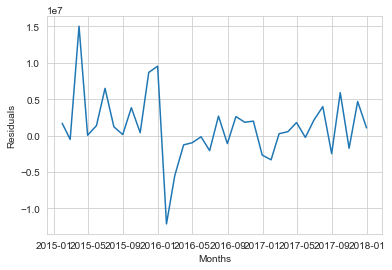

In [30]:
# Plotting residuals over time
plt.plot(residuals)
plt.xlabel('Months')
plt.ylabel('Residuals')
plt.show()

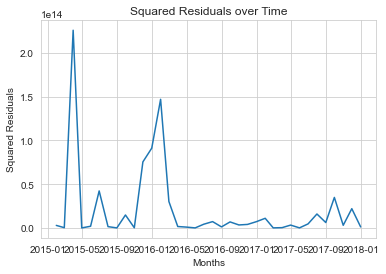

In [31]:
# Plotting squared residuals over time
plt.plot(residuals**2)
plt.xlabel('Months')
plt.ylabel('Squared Residuals')
plt.title('Squared Residuals over Time')
plt.show()

In [32]:
# I decided to use a different model because it was not working, now let's use the Holt-Winters Exponential Smoothing model.

C:\Users\rapla\Documents\Programacion\Instalador_python_and_anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



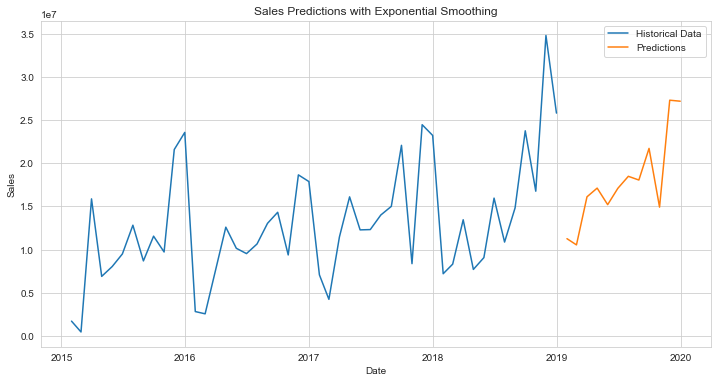

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Create and fit the exponential smoothing model
model = ExponentialSmoothing(monthly_sales, seasonal='add', seasonal_periods=12)
model_fit = model.fit()

predictions = model_fit.forecast(12)  # Forecast the next 12 months

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Historical Data')
plt.plot(predictions, label='Predictions')
plt.title('Sales Predictions with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

C:\Users\rapla\Documents\Programacion\Instalador_python_and_anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



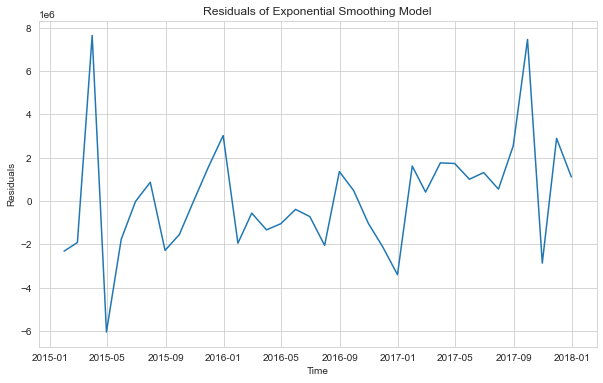

In [34]:
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

# Fit the exponential smoothing model
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# Get the residuals from the model
residuals = fit.resid

# Visualize the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of Exponential Smoothing Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

In [35]:
# Durbin-Watson statistic to test for autocorrelation in the residuals.
dw_statistic = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_statistic)

# Shapiro-Wilk test to assess the normality of the residuals.
shapiro_stat, shapiro_p_value = shapiro(residuals)
print("Shapiro-Wilk test p-value:", shapiro_p_value)

# Add a column of ones to the training data
train_with_const = np.column_stack((np.ones(len(train)), train))

# Breusch-Pagan test to detect heteroscedasticity in the residuals.
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, exog_het=train_with_const)
print("Breusch-Pagan test p-value:", lm_p_value)

Durbin-Watson statistic: 2.2659341987385533
Shapiro-Wilk test p-value: 0.02526973857767379
Breusch-Pagan test p-value: 0.12836979754221445


In [36]:
Data.describe(include='all')

Row ID                     Order Date                      Ship Date  \
count  9696.00                           9696                           9696   
unique     NaN                            NaN                            NaN   
top        NaN                            NaN                            NaN   
freq       NaN                            NaN                            NaN   
mean   4901.91  2017-04-30 22:13:04.158415616  2017-05-04 21:12:10.693069312   
min       1.00            2015-01-03 00:00:00            2015-01-07 00:00:00   
25%    2452.75            2016-05-25 00:00:00            2016-05-28 00:00:00   
50%    4903.50            2017-06-26 00:00:00            2017-06-28 12:00:00   
75%    7347.25            2018-05-15 00:00:00            2018-05-19 00:00:00   
max    9800.00            2018-12-30 00:00:00            2019-01-05 00:00:00   
std    2825.59                            NaN                            NaN   

             Ship Mode  Customer Name   Segment           City       State  \
count             9696           9696      9696           9696        9696   
unique               4            793         3            528          48   
top     Standard Class  William Brown  Consumer  New York City  California   
freq              5794             35      5049            881        1921   
mean               NaN            NaN       NaN            NaN         NaN   
min                NaN            NaN       NaN            NaN         NaN   
25%                NaN            NaN       NaN            NaN         NaN   
50%                NaN            NaN       NaN            NaN         NaN   
75%                NaN            NaN       NaN            NaN         NaN   
max                NaN            NaN       NaN            NaN         NaN   
std                NaN            NaN       NaN            NaN         NaN   

        Postal Code Region       Product ID         Category Sub-Category  \
count       9685.00   9696             9696             9696         9696   
unique          NaN      4             1857                3           17   
top             NaN   West  OFF-PA-10001970  Office Supplies      Binders   
freq            NaN   3106               19             5890         1478   
mean       55211.75    NaN              NaN              NaN          NaN   
min         1040.00    NaN              NaN              NaN          NaN   
25%        23223.00    NaN              NaN              NaN          NaN   
50%        57103.00    NaN              NaN              NaN          NaN   
75%        90008.00    NaN              NaN              NaN          NaN   
max        99301.00    NaN              NaN              NaN          NaN   
std        32054.25    NaN              NaN              NaN          NaN   

           Product Name      Sales   Month  
count              9696    9696.00 9696.00  
unique             1844        NaN     NaN  
top     Staple envelope        NaN     NaN  
freq                 47        NaN     NaN  
mean                NaN   63785.13    7.82  
min                 NaN       0.44    1.00  
25%                 NaN      38.88    5.00  
50%                 NaN     335.20    9.00  
75%                 NaN   22800.00   11.00  
max                 NaN 1598058.00   12.00  
std                 NaN  179758.10    3.28

In [37]:
# the p-value of Shapiro-Wilk test is less than 0.05 so there is not normal distribution
# so I decided to apply the Box-Cox transformation to the time series 'monthly_sales'. 
# the idea is to stabilize the variance of a time so I could have better chances to get a normal distribution.

from scipy.stats import boxcox

transformed_sales, lambda_value = boxcox(monthly_sales)
print("lamdba value:", lambda_value)

lamdba value: 0.6074678369220876


In [38]:
# Applying the Box-Cox transformation to the time series 'monthly_sales' using the optimal lambda value

from scipy.stats import boxcox

transformed_sales = boxcox(monthly_sales, lmbda=lambda_value)

C:\Users\rapla\Documents\Programacion\Instalador_python_and_anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



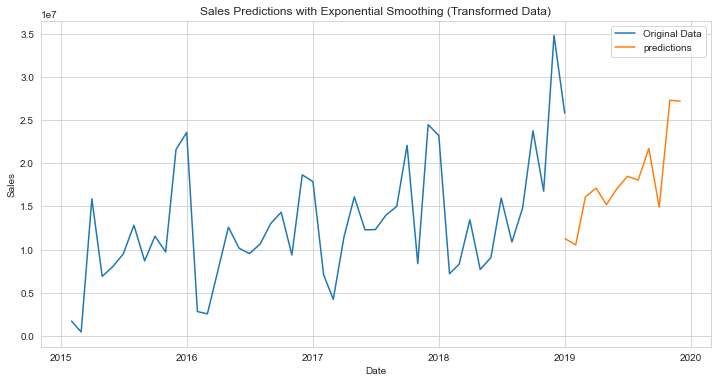

In [39]:
# This code performs exponential smoothing on transformed sales data. 
# It first creates a model using ExponentialSmoothing from statsmodels, then fits the model to the data.

from statsmodels.tsa.api import ExponentialSmoothing
from scipy.stats import boxcox
from scipy.special import inv_boxcox


forecast_period = pd.date_range(start='2019-01-01', periods=12, freq='MS')
model = ExponentialSmoothing(transformed_sales, trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()


factor = 1
scaled_predictions = predictions * factor

predictions = fit.forecast(12)
transformed_predictions = boxcox(scaled_predictions, lmbda=lambda_value)
original_predictions = inv_boxcox(transformed_predictions, lambda_value)

predictions_series = pd.Series(original_predictions, index=forecast_period)


predictions_df = pd.DataFrame({'Date': forecast_period, 'predictions': original_predictions})


plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Original Data')
plt.plot(predictions_df['Date'], predictions_df['predictions'], label='predictions')
plt.title('Sales Predictions with Exponential Smoothing (Transformed Data)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [41]:
# here we can see the predicted values for 2019.
print(predictions_df)

         Date  predictions
0  2019-01-01  11256630.52
1  2019-02-01  10535456.53
2  2019-03-01  16104748.55
3  2019-04-01  17115337.27
4  2019-05-01  15198401.69
5  2019-06-01  17088698.79
6  2019-07-01  18482984.94
7  2019-08-01  18050703.61
8  2019-09-01  21716908.00
9  2019-10-01  14908921.57
10 2019-11-01  27302395.11
11 2019-12-01  27185122.93


In [42]:
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan

# Durbin-Watson Statistic
dw_statistic = durbin_watson(fit.resid)
print("Durbin-Watson Statistic:", dw_statistic)

# Shapiro-Wilk Test
shapiro_stat, shapiro_p_value = shapiro(fit.resid)
print("Shapiro-Wilk Test p-value:", shapiro_p_value)

Durbin-Watson Statistic: 1.795072009274463
Shapiro-Wilk Test p-value: 0.7038604100575523


<function matplotlib.pyplot.show(close=None, block=None)>

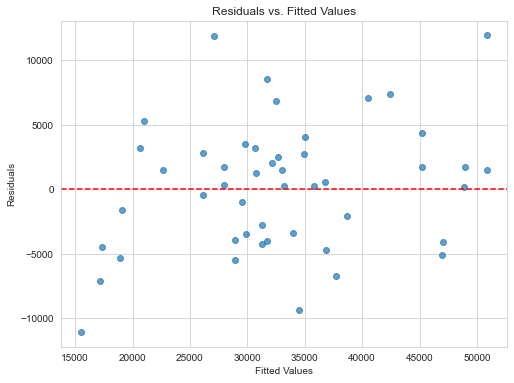

In [43]:
residuals = fit.resid


fitted_values = fit.fittedvalues


plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show

In [44]:
# there is no autocorrelation because it is close to 2 (The Durbin-Watson statistic ranges from 0 to 4)
# there is Normality of Residuals because p-value with the Shapiro-Wilk test is more than 0.05 (0.703)
# there is not Heteroscedasticity because there is not pattern represented by points in the graph.

In [45]:
# I performed the ANOVA test to determine if there are significant differences in sales between the cities.
from scipy.stats import f_oneway

city_groups = {}
for city, group_data in Data.groupby('City'):
    city_groups[city] = group_data['Sales']


f_statistic, p_value = f_oneway(*city_groups.values())


alpha = 0.05
if p_value < alpha:
    print("There are significant differences in sales between the cities (p < 0.05)")
else:
    print("There are no significant differences in sales between the cities (p >= 0.05)")

There are significant differences in sales between the cities (p < 0.05)


In [46]:
# I created a contingency table using pd.crosstab to examine the relationship between the 'State' column and a combination of 'Segment' and 'Sub-Category' columns

from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(index=Data['State'], columns=[Data['Segment'], Data['Sub-Category']])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Valor chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)

Valor chi-cuadrado: 2508.3764408058873
Valor p: 0.011607400720397476
Grados de libertad: 2350


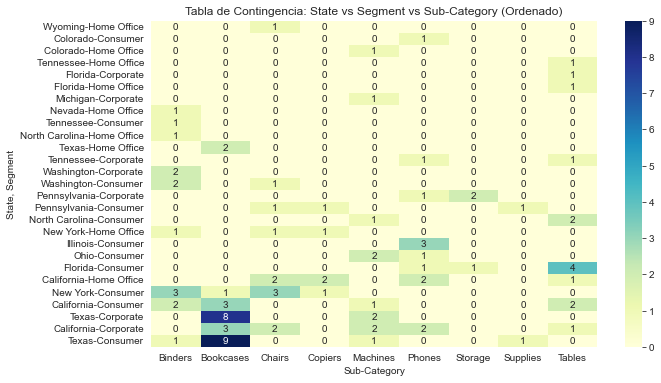

In [47]:
import seaborn as sns

# Crear una tabla de contingencia
contingency_table = pd.crosstab(index=[outliers['State'], outliers['Segment']], columns=outliers['Sub-Category'])

row_sums = contingency_table.sum(axis=1)
contingency_table_sorted = contingency_table.loc[row_sums.sort_values(ascending=True).index]

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_sorted, annot=True, cmap="YlGnBu")
plt.title('Tabla de Contingencia: State vs Segment vs Sub-Category (Ordenado)')
plt.xlabel('Sub-Category')
plt.ylabel('State, Segment')
plt.show()